<a href="https://colab.research.google.com/github/sarahjlassi/resaux_neurone/blob/main/MP_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Pour installer module de l'interfaace graphique
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.6 MB/s 
     |████████████████████████████████| 51 kB 109 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=3ee8fa9b26439edbb1b0ab46c52d474e26737c620293ae7d12fc7e2ee010c079
  Stored in directory: /root/.cache/pip/wheels/ea/f9/a1/34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py


In [ ]:
#bibliotheque qui permet de faire traitement d'image de base
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Train datset
normal_train_dir = os.path.join('/content/drive/MyDrive/datset/train/normal')
ben_train_dir = os.path.join('/content/drive/MyDrive/datset/train/BEN')
can_train_dir = os.path.join('/content/drive/MyDrive/datset/train/CAN')

normal=os.listdir(normal_train_dir)
ben=os.listdir(ben_train_dir)
can=os.listdir(can_train_dir)

In [ ]:
print(' normal images:', len(normal))
print(' ben images:', len(ben))
print(' can images:', len(can))

 normal images: 3686
 ben images: 620
 can images: 781


Affichage de qlq cellule normale



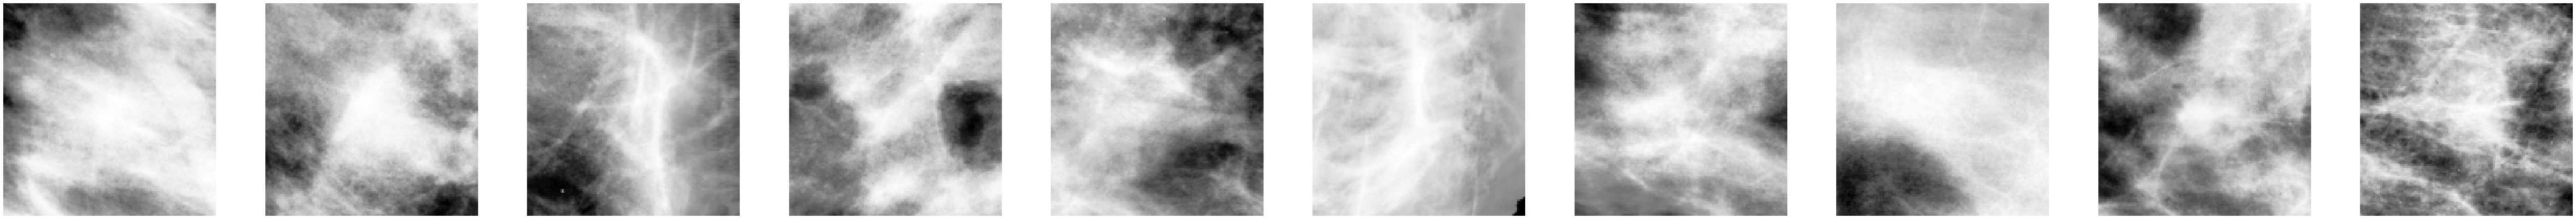


Affichage de qlq cellule benign


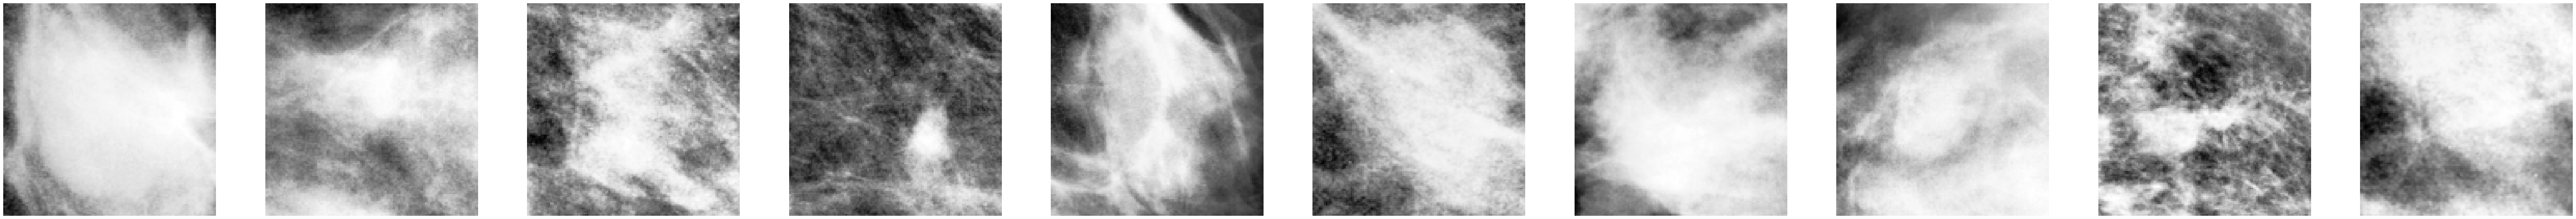


Affichage de qlq cellule malignant



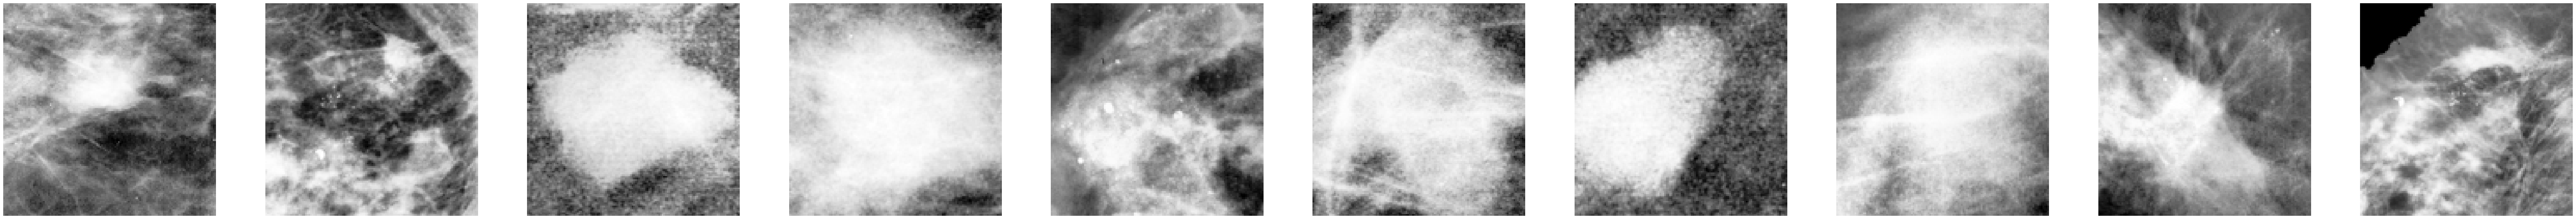

In [ ]:
nrows = 10
ncols = 10
fig = plt.gcf()
fig.set_size_inches(ncols * 10, nrows * 10)
n = [os.path.join(normal_train_dir, fname) for fname in normal[:10]]
b = [os.path.join(ben_train_dir, fname) for fname in ben[:10]]
m = [os.path.join(can_train_dir, fname) for fname in can[:10]]



print ("Affichage de qlq cellule normale")
print()
for i, img_path in enumerate(n):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap='Greys_r')

plt.show()

print()
print ("Affichage de qlq cellule benign")
fig = plt.gcf()
fig.set_size_inches(ncols * 10, nrows * 10)
for i, img_path in enumerate(b):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap='Greys_r')

plt.show()

print()
print ("Affichage de qlq cellule malignant")
fig = plt.gcf()
fig.set_size_inches(ncols * 10, nrows * 10)
print()
for i, img_path in enumerate(m):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap='Greys_r')

plt.show()

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/datset/train",
                                          target_size = (200, 200),
                                          batch_size = 64,
                                          class_mode = 'binary'
                                        )

test_dataset = test.flow_from_directory("/content/drive/MyDrive/datset/test",
                                          target_size = (200, 200),
                                          batch_size = 32,
                                          class_mode = 'binary'
                                        )


Found 5087 images belonging to 3 classes.
Found 3373 images belonging to 3 classes.


In [ ]:
train_dataset.class_indices

{'BEN': 0, 'CAN': 1, 'normal': 2}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape =(200, 200, 3)), tf.keras.layers.MaxPool2D(2,2), #
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),#
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),#
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),#
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

In [ ]:
from tensorflow.python import metrics
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr=0.001), metrics = ["accuracy"])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 95, 95, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 577600)            0         
                                                                 
 dense (Dense)               (None, 512)               295731712 
                                                        

In [ ]:
model_fit = model.fit(train_dataset,
                      epochs = 10,
                      validation_data =test_dataset
                      )

Epoch 1/10
80/80 [==============================] - 434s 5s/step - loss: -90032922624.0000 - accuracy: 0.1535 - val_loss: -217732333568.0000 - val_accuracy: 0.1020
Epoch 2/10
80/80 [==============================] - 441s 6s/step - loss: -333356498944.0000 - accuracy: 0.1535 - val_loss: -701834395648.0000 - val_accuracy: 0.1020
Epoch 3/10
80/80 [==============================] - 451s 6s/step - loss: -933356961792.0000 - accuracy: 0.1535 - val_loss: -1793113718784.0000 - val_accuracy: 0.1020
Epoch 4/10
80/80 [==============================] - 435s 5s/step - loss: -2174089953280.0000 - accuracy: 0.1535 - val_loss: -3885016809472.0000 - val_accuracy: 0.1020
Epoch 5/10
80/80 [==============================] - 439s 6s/step - loss: -4401956651008.0000 - accuracy: 0.1535 - val_loss: -7561416802304.0000 - val_accuracy: 0.1020
Epoch 6/10
80/80 [==============================] - 441s 6s/step - loss: -8220141682688.0000 - accuracy: 0.1535 - val_loss: -13612858998784.0000 - val_accuracy: 0.1020
Epo

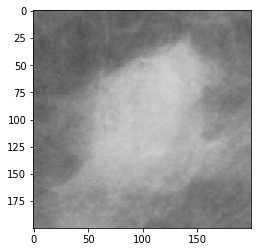

1/1 [==============================] - 0s 128ms/step
benign


In [ ]:
img = image.load_img("/content/drive/MyDrive/datset/test/ben/9216.png", target_size = (200,200))
plt.imshow(img)
plt.show()
X= image.img_to_array(img)
X = np.expand_dims(X, axis = 0)
images = np.vstack([X])
val = model.predict(images)
if(val == 0):
  print("Normal")
elif(val == 1):
  print("benign")
else:
  print("malignant")

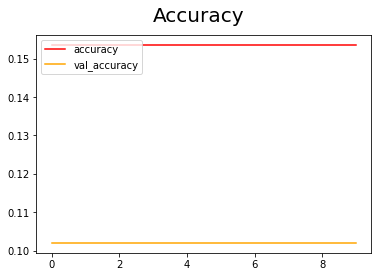

In [ ]:
fig = plt.figure()
plt.plot(model_fit.history['accuracy'], color='red', label='accuracy')
plt.plot(model_fit.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
!pip install pretty_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 156 kB 32.4 MB/s 
     |████████████████████████████████| 9.4 MB 62.6 MB/s 
     |████████████████████████████████| 103 kB 73.7 MB/s 
     |████████████████████████████████| 199 kB 65.4 MB/s 
     |████████████████████████████████| 73 kB 1.9 MB/s 
     |████████████████████████████████| 41 kB 644 kB/s 
     |████████████████████████████████| 68 kB 5.3 MB/s 
     |████████████████████████████████| 965 kB 69.6 MB/s 
     |████████████████████████████████| 295 kB 63.3 MB/s 
     |████████████████████████████████| 98 kB 8.9 MB/s 
     |████████████████████████████████| 8.8 MB 58.0 MB/s 
     |████████████████████████████████| 468 kB 72.4 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=35401198e433ab08dd5d860ce7c9e24ed9b5779771e8d2ce4e7ae9036bf0f454
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1c

<ipython-input-52-49c2b8e9553c>:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_dataset, steps=test_steps_per_epoch)


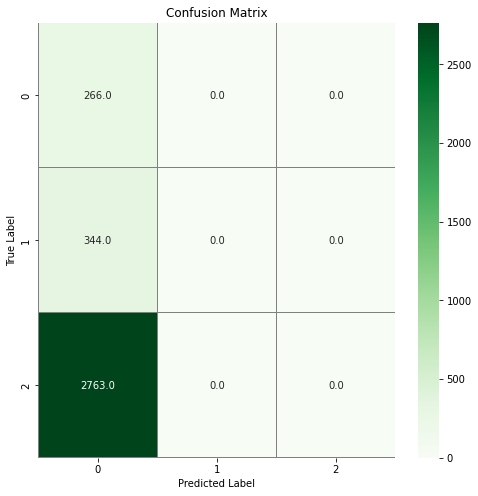

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics


test_steps_per_epoch = np.math.ceil(test_dataset.samples / test_dataset.batch_size)

predictions = model.predict_generator(test_dataset, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys())

y_pred = np.argmax(predictions, axis=1)  
confusion_matrix = confusion_matrix(true_classes, y_pred)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import anvil.server
anvil.server.connect("RXQKER736DPDZYNEQM2ROREM-DIM6HONJWNMEKLTP")

In [ ]:
import anvil.media
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from PIL import Image
import PIL.Image
@anvil.server.callable
def classify_image(file) :
  with anvil.media.TempFile(file) as filename:
    img = load_img(filename)
    img = img.resize((200,200) ,resample=PIL.Image.BICUBIC) 
    arr= img_to_array(img)
    arr= np.expand_dims(arr, axis=0)
    arr /=255.0

    val=model.predict(arr)

    return ( 'Normal' if val==0 else 'Benign' if val==1 else 'Malignant', float(val))